### This script utilizes deep learning techniques to analyze sentiments in movie reviews. After preprocessing the text data and addressing class imbalance, it trains a Sequential model with GRU layers. However, the model's performance seems suboptimal, as indicated by an accuracy score of around 49%. Further optimization may be needed to enhance its predictive capabilities.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,layers
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Read the dataset

In [2]:
df=pd.read_csv('movie_data.csv')

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check for missing values

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Check for duplicates

In [5]:
df.duplicated().sum()

418

In [6]:
df.drop_duplicates(inplace=True)

### Print some of the text along with its author

In [7]:
for i in range(3):
    print(df['review'][i],'-',df['sentiment'][i])
    
    print( )

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### Create a function to preproces the text

In [8]:
def preproces(sentence):
    text=re.sub(r"[^0-9a-zA-Z]",'',sentence).split()
    words=[i.lower() for i in text if i not in stopwords.words('english')]
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(word,'v') for word in words]
    
    return ' '.join(word)

In [9]:
df['review']=df['review'].apply(preproces)

### Print some of the text after preprocess

In [10]:
for i in range(3):
    print(df['review'][i],'-',df['sentiment'][i])
    
    print( )

thismovieisjustcrapeventhoughthedirectorsclaimtobepartofthatoicultureitsstillaveryverybaddirectorialdebutthetopicitselfisveryinterestingandiacceptthebadactingduetothefactthattheyareallamateursandneveractedbeforebuttheworstthingaboutthisfilmarethedialogsandveryunexperiencedandnaivedirectingtheresnotimingatallinthatmovieifeltlikethedirectorsweresoexitedtodothatmovieitstheirfirstfeaturethattheyactuallyneverreallyaskedthemselveswhatstorytheywannatellimetbenoneofthedirectorsonseveraloccasionsandhesaniceandthoughtfulguybutthatdoesntmakehimadirectorithinkthatamericanhistoryxisfullofclichsbutsomehowmanagestotransportastoryoiwarningisfullofclichsdoesnttellanythingneworprovocativeandthatsthesadthingaboutthismovieitsfarfromanyoirealitybrbrifyouwannaseeweirdbutgreatgermanfilmswatchthemoviesofmichaelhanekechristophschlingensiefoskarroehlerhansweingartneroroliverhirschbiegelbrbrbennysvideofunnygamesdieunberhrbaremeinletzterfilmdasexperimentdasweisserauschenmuxmuschenstillbrbroutoftenbecauseofthetopi

### Check for imbalance in the dataset

<Axes: xlabel='count', ylabel='sentiment'>

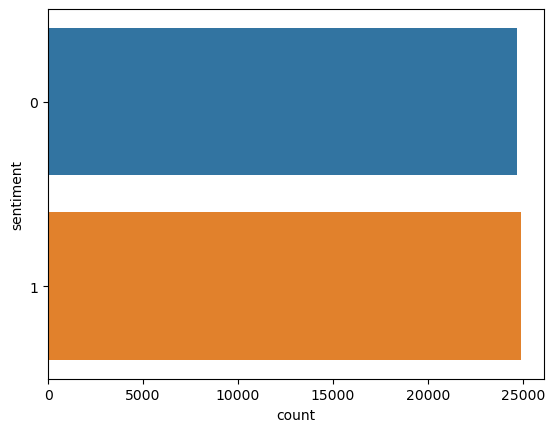

In [14]:
sns.countplot(y=df['sentiment'])

### Split the dataset into Input & Target Variables

In [15]:
X=df['review']
y=df['sentiment']

### Create Keras tokenizer object with 5000 max words
Convert text to sequence

Add padding

In [16]:
tokenizer=Tokenizer(num_words=4000)

In [17]:
tokenizer.fit_on_texts(X)

In [18]:
vocab_size=len(tokenizer.word_index)+1

In [19]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    
    padded_sequence=pad_sequences(encoded_docs, maxlen=125)
    
    return padded_sequence

### Split the dataset into Training & Testing set

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train=text_encoding(X_train)
X_test=text_encoding(X_test)

### Create keras Sequential model with GRU layers

In [22]:
model=Sequential()

model.add(layers.Embedding(vocab_size,125))

model.add(layers.GRU(125, return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.GRU(125))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(2, activation='softmax'))


### Compile the model

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [24]:
model.fit(X_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 207s 173ms/step - accuracy: 0.4997 - loss: 0.6944 - val_accuracy: 0.4758 - val_loss: 0.6949
Epoch 2/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 207s 176ms/step - accuracy: 0.5016 - loss: 0.6934 - val_accuracy: 0.4758 - val_loss: 0.6939
Epoch 3/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 199s 169ms/step - accuracy: 0.5178 - loss: 0.6714 - val_accuracy: 0.5151 - val_loss: 0.7288
Epoch 4/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 199s 169ms/step - accuracy: 0.5402 - loss: 0.6400 - val_accuracy: 0.4788 - val_loss: 0.7124
Epoch 5/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 212s 180ms/step - accuracy: 0.5427 - loss: 0.6400 - val_accuracy: 0.5161 - val_loss: 0.7143
Epoch 6/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 198s 169ms/step - accuracy: 0.5415 - loss: 0.6377 - val_accuracy: 0.4783 - val_loss: 0.7154
Epoch 7/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 197s 167ms/step - accuracy: 0.5416 - loss: 0.6382 - val_accuracy: 0.4788 - val_loss: 0.6968
Epoch 8/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 204s 173ms/step - ac

### Make predictions with Test set

In [25]:
y_pred=model.predict(X_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


### Fetch the index of the higher probable prediction

In [26]:
y_pred=[np.argmax(i) for i in y_pred]

In [27]:
y_pred=[np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [28]:
accuracy_score(y_test,y_pred)

0.49056603773584906

### Confusion matrix

<Axes: >

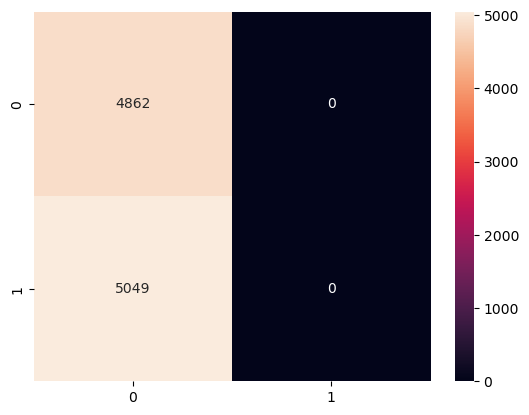

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

### Classification Report

In [30]:
classification_report(y_test, y_pred)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.49      1.00      0.66      4862\n           1       0.00      0.00      0.00      5049\n\n    accuracy                           0.49      9911\n   macro avg       0.25      0.50      0.33      9911\nweighted avg       0.24      0.49      0.32      9911\n'